<a href="https://colab.research.google.com/github/carlosmanm/Data_Science/blob/main/Models_Algorithms/Deep_Learning/Neural_Network_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Redes Neuronales**

Neuronas y función de activación, Usando un modelo pre entrenado para reconocimiento de imágenes, Trabajando un dataset

En la vida real la mayoría de problemas que vamos a resolver no serán lineales, afortunadamente tenemos varias herramientas que nos permiten modelarlo. Para esto necesitamos a las redes neuronales artificiales.


Una red neuronal funciona de la siguiente manera: Como cualquier problema siempre hay un input y un output, pero cuando los problemas NO son lineales, se crea una capa oculta, en donde se agregan nodos en los que existe una conexión entre ellos (funcion de activacion), estas pueden variar siendo de una o múltiples vías. 

Es decir en lugar de que el problema se resulva como:

 Input - Output

 Input - Capa oculta (nodos adicionales = red neuronal) - Output

 Y entre más complejo es el problema, más capas podemos agregar:

 Input - Capa Oculta 1 - Capa Oculta 2 - Output

 Podemos agregar multiples de estas capas, con multiples neuronas y cada neurona tendra una funcion de activacion (funcion matematica). 

 Caso:

 * Input - Capa Oculta 1 -- Transformacion no lineal (funcion de activacion) -- Capa Oculta 2 - Output 

 El deep learning es ML pero con multiples capas ocultas: Nuestra tarea es implementarlo y elegir que ira en estas capas, como activaremos las neuronas y como vamos a conectar toda la red

También se pueden moderar de varias formas y cada una de estas capas puede variar dependiendo de la cantidad de capas ocultas que tengamos.

Cada neurona tiene una función de activación y nos va a permitir conectar las múltiples capas para realizar la transformación de lineal a red neuronal.



# **Conceptos Basicos**

Perceptrón: Neurona básica. Tendrá la input, output y una función en medio. Normalmente trabaja con la función de Heaviside. A esto se le puede agregar complejidad y funciones de activación como Sigmoid, Tanh, ReLUs y otras más.

Tanh (Tangente Hiperbolica): Se puede modelar como un caso específico del Sigmoid (en lugar del Sigmoid que va del 0 al 1, este va de -1 a 1), nos ayuda porque esta escalado. La curva es diferente y puede saturarse en algunos casos.

ReLU (Rectificadores Lineales): Evita el problema de vanishing gradient pero solo puede utilizarse en las hidden layers de una NN. Existen variantes para evitar algunos de los problemas más comunes como neuronas muertas.

Las Neural Networks nos permiten solucionar problemas NO Lineales incluyendo mas pasos intermedios (capas ocultas que guardan multiples neuronas) que abstraigan estos detalles. Cada neurona incluira una funcion de activacion y para estas funciones existen varias opciones. 

### Usando un modelo pre entrenado para reconocimiento de imágenes

In [ ]:
  import torch 
  from torchvision import utils
  from torchvision import models
  from torchvision import datasets
  from torchvision import transforms

  from PIL import Image
  import urllib.request as request 
  from matplotlib import pyplot as plt

#### Modelo pre-entrenado

In [ ]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


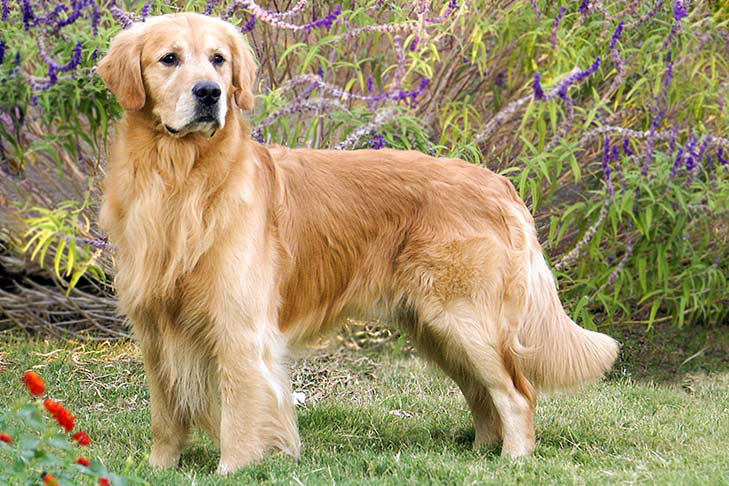

In [ ]:
url = 'https://disenlis.com/wp-content/uploads/2019/01/Golden-Retriever-Standing1.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [ ]:
preprocess = transforms.Compose([
           transforms.Resize(128), # La ajustamos a nuestro gusto
           transforms.CenterCrop(130), # La centramos para omitir otros objetos
           transforms.ToTensor(), # La imagen siempre han sido numeros, pero ahora lo haremos tensor para que solo sean numeros
           transforms.Normalize(
               mean = [0.485, 0.456, 0.406], 
               std = [0.229, 0.224, 0.225]
           )                      
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


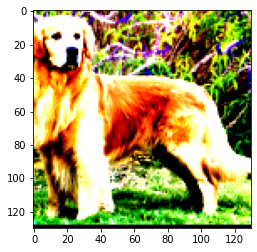

In [ ]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

#### Observemos las capas ocultas

In [ ]:
inception.eval() 

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

**Todos los numeros que estan aqui, son la imagen, luego de haber pasado por la red neuronal y su representacion son estos valores:**

In [ ]:
out = inception(batch)
out

tensor([[ 5.3735e+00,  7.4500e+00,  3.7908e-02, -1.9849e+00, -4.1056e+00,
         -1.3194e+00,  3.6625e+00,  3.7809e+00,  7.5255e+00, -3.1800e+00,
         -6.7730e-01,  9.7767e-01,  2.1901e+00,  2.8141e+00, -4.7592e+00,
         -1.7234e+00, -1.0442e+00,  1.4821e+00, -3.4119e+00, -1.8424e+00,
         -5.2461e+00, -4.6043e+00, -1.2020e+00,  2.6291e+00, -6.1030e+00,
         -2.0992e+00, -6.7903e+00, -5.0213e+00,  1.0228e+00, -1.3758e+00,
         -6.4162e-01,  1.3998e+00, -2.0427e+00, -3.4822e+00, -1.8016e-01,
         -2.9957e+00,  6.5869e-01,  3.5221e+00,  3.5511e+00, -2.2409e+00,
         -2.6401e+00, -4.6928e+00, -5.0683e-01,  3.0845e+00, -4.7716e+00,
         -3.6526e+00, -5.8693e+00, -6.1417e+00,  8.7314e+00,  9.3243e-01,
         -2.9644e+00,  3.6674e+00, -9.6827e+00, -6.4843e+00, -1.1655e+01,
          3.7956e+00, -5.8006e+00, -1.8337e+00, -5.2659e+00, -1.7007e+00,
         -6.1012e+00,  9.0002e-01,  1.7512e+00, -2.6893e+00,  2.1762e+00,
         -4.1142e+00, -7.3756e+00,  3.

#### Traemos las etiquetas

In [ ]:
 request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [ ]:
out

tensor([[ 5.3735e+00,  7.4500e+00,  3.7908e-02, -1.9849e+00, -4.1056e+00,
         -1.3194e+00,  3.6625e+00,  3.7809e+00,  7.5255e+00, -3.1800e+00,
         -6.7730e-01,  9.7767e-01,  2.1901e+00,  2.8141e+00, -4.7592e+00,
         -1.7234e+00, -1.0442e+00,  1.4821e+00, -3.4119e+00, -1.8424e+00,
         -5.2461e+00, -4.6043e+00, -1.2020e+00,  2.6291e+00, -6.1030e+00,
         -2.0992e+00, -6.7903e+00, -5.0213e+00,  1.0228e+00, -1.3758e+00,
         -6.4162e-01,  1.3998e+00, -2.0427e+00, -3.4822e+00, -1.8016e-01,
         -2.9957e+00,  6.5869e-01,  3.5221e+00,  3.5511e+00, -2.2409e+00,
         -2.6401e+00, -4.6928e+00, -5.0683e-01,  3.0845e+00, -4.7716e+00,
         -3.6526e+00, -5.8693e+00, -6.1417e+00,  8.7314e+00,  9.3243e-01,
         -2.9644e+00,  3.6674e+00, -9.6827e+00, -6.4843e+00, -1.1655e+01,
          3.7956e+00, -5.8006e+00, -1.8337e+00, -5.2659e+00, -1.7007e+00,
         -6.1012e+00,  9.0002e-01,  1.7512e+00, -2.6893e+00,  2.1762e+00,
         -4.1142e+00, -7.3756e+00,  3.

In [ ]:
_, index = torch.max(out, 1)

In [ ]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 99.56989288330078)

Nuestra respuestas es un golden retriever, con una probabilidad del 99% de probabilidad

Podemos probar que otras razas reconocio nuestro algoritmo, con su respectiva probabilidad

In [ ]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

golden retriever 99.56989288330078
Saluki, gazelle hound 0.3172139525413513
Irish setter, red setter 0.06816954165697098
Brittany spaniel 0.044417861849069595
Afghan hound, Afghan 0.00017025391571223736


## Trabajando con un dataset

In [ ]:
data_path = 'data/'

# Definimos el set de entrenamiento y el set de validacion

dataset = datasets.CIFAR10(data_path, train=True, download=True) # La biblioteca es CIFAR10
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
 classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck'] # Las clases del dataset CIFAR10

In [ ]:
len(dataset) # 50,000 imagenes diferentes

50000

In [ ]:
img, label = dataset[50] # Estoy tomando la imagen 50 (numero arbitrario)
img, label, classes[label] # Mostramos su etiqueta

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE8F02499B0>, 9, 'truck')

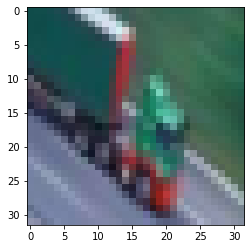

In [ ]:
plt.imshow(img) # Mostramos la imagen

Tranformamos nuestra imagen en un tensor

In [ ]:
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape # Esta sigue siendo la imagen pero representada en numeros

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE8F02499B0>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

Esto puede ser más facil, desde el momento en el que llamamos el dataset podemos transformar todas las imagenes a formato de tensor. 

In [ ]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor()) 

Files already downloaded and verified


In [ ]:
img, label = dataset[50] # Automaticamente la imagen 50 es un tensor
img

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

Ya que es un tensor podemos obtener valor como los valores minimos, maximos, su media, su desviacion estandar etc

In [ ]:
img.min(), img.max(), torch.mean(img), torch.std(img)

(tensor(0.0314), tensor(0.9529), tensor(0.3691), tensor(0.1625))

Tambien podemos permutarla para poder verla nuevamente como una imagen

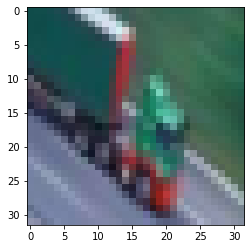

In [ ]:
plt.imshow(img.permute(1, 2, 0))

Quiero que todas las imagenes de mi dataset tengan estas dimensiones asi que eso lo hare con un stack y un For 

In [ ]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [ ]:
imgs.shape # Validamos que la dimension sea de 3

torch.Size([3, 32, 32, 50000])

Anterioremente realizamos la transformacion con valores de la media y desviacion estandar, ahora, estos se calculan de la siguiente manera:

In [ ]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
              ])


'frog'

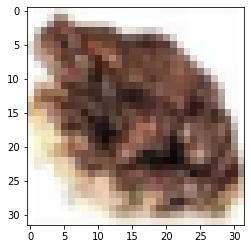

In [ ]:
img_transformed,label = dataset[125]

plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]

Ya tenemos nuestro dataset listo para trabajar